In [1]:
# 이미지 resize 를 위한 
from PIL import Image 
import os
import glob

def resize_images(img_path):
    images=glob.glob(img_path + '/*.jpg')
    print(len(images), 'images to be resized')
     
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,'JPEG')
        
    print(len(images),'images resized.')
    
image_dir_path = os.getenv('HOME')+"/Aiffel_Final/Exploration/Ex-01/rock_scissor_paper/rock"
resize_images(image_dir_path)

print('바위 이미지 resize 완료')


3100 images to be resized
3100 images resized.
바위 이미지 resize 완료


In [2]:
image_dir_path = os.getenv('HOME')+"/Aiffel_Final/Exploration/Ex-01/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print('가위 이미지 resize 완료')

3100 images to be resized
3100 images resized.
가위 이미지 resize 완료


In [3]:
image_dir_path = os.getenv('HOME')+"/Aiffel_Final/Exploration/Ex-01/rock_scissor_paper/paper"
resize_images(image_dir_path)

print('보 이미지 resize 완료')

3100 images to be resized
3100 images resized.
보 이미지 resize 완료


In [4]:
import numpy as np 

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=9600   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/Aiffel_Final/Exploration/Ex-01/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 9300 입니다.
x_train shape: (9600, 28, 28, 3)
y_train shape: (9600,)


라벨:  0


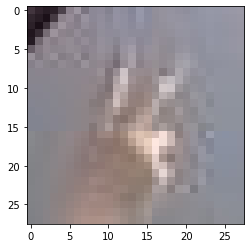

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [6]:
import tensorflow as tf
from tensorflow import keras

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (No

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.8565 - accuracy: 0.5828
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4810 - accuracy: 0.8129
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2913 - accuracy: 0.8933
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1886 - accuracy: 0.9359
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1251 - accuracy: 0.9594
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0990 - accuracy: 0.9694
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0710 - accuracy: 0.9798
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0444 - accuracy: 0.9897
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0440 - accuracy: 0.9884
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0363 - accuracy: 0.9903

In [8]:
import numpy as np 

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=600   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/Aiffel_Final/Exploration/Ex-01/rock_scissor_paper_test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


In [9]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 0.2562 - accuracy: 0.9133
test_loss: 0.25624752044677734 
test_accuracy: 0.9133333563804626


In [10]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.6536559e-01 3.4226365e-02 4.0802965e-04]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


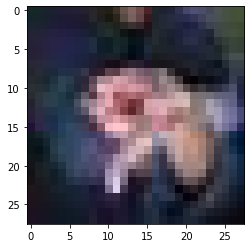

In [11]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.6995554  0.00988884 0.2905558 ]
라벨: 2, 예측결과: 0


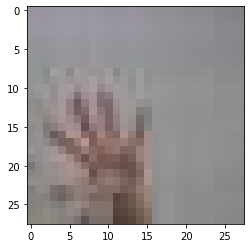

예측확률분포: [0.46796617 0.34729373 0.18474005]
라벨: 1, 예측결과: 0


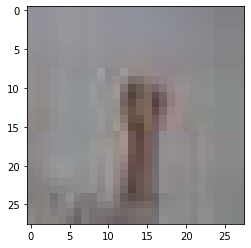

예측확률분포: [0.84111524 0.09531188 0.06357291]
라벨: 1, 예측결과: 0


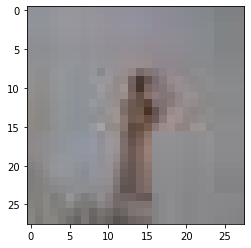

예측확률분포: [0.6941162  0.00125853 0.30462524]
라벨: 2, 예측결과: 0


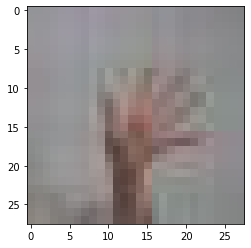

예측확률분포: [0.8613671  0.01335773 0.12527518]
라벨: 1, 예측결과: 0


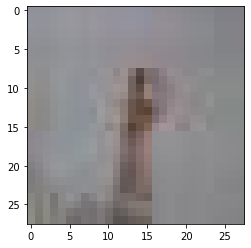

In [12]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 회고 

학습데이터를 정규화를 한 후에 학습을 돌리고, 테스트 데이터도 같은 방법으로 정규화를 하고 예측을 하면 로스값이 줄어든다. 물론 정확도도 올라간다. 
학습 횟수를 늘린다면 과적합이(오버피팅) 일어날 수 있다. 단순히 학습할 때의 이미지만 잘 맞춘다는 소리 

로스값은 어떤 영향을 주는가를 한번 고민하는 시간을 가져보면 좋을꺼 같다. 

학습데이터가 많으면 많을 수록 좋다. 


### 토막 리눅스 사용법

mkdir -p : mkdir를 사용하여 하위 디렉토리를 생성할때 차례대로 만들지 않고 중간 디렉토리 없이 바로 그 다음 하위 디렉토리를 만들게되면 "디렉토리를 생성할 수 없습니다." 라는 메시지가 나오는데, -p 옵션을 주어 생성하게 되면 자동으로 중간 단계의 디렉토리를 생성하면서 그 하위 디렉토리를 생성하게 됩니다.

In [13]:
# # 원하는 디렉토리로 이동 =3
# $ cd  ~/aiffel/rock_scissor_paper/rock

# # 압축 해제 명령어 : unzip <파일명>.zip
# $ unzip rock.zip

# # 가위, 보에 대해서도 똑같이 실행!
# $ cd  ~/aiffel/rock_scissor_paper/scissor
# $ unzip scissor.zip

# $ cd  ~/aiffel/rock_scissor_paper/paper
# $ unzip paper.zip